<a href="https://colab.research.google.com/github/whoisfebry/forestfires-analysis/blob/main/UAS_Machine_Learning_R_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
print("Data Sample:")
display(df.head())

Saving forestfires.csv to forestfires.csv
Data Sample:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# 3. Info dataset & missing values
print("\nInfo Dataset:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB

Missing Values:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [ ]:
# 4. Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
# 5. Encoding kolom kategorikal
le_month = LabelEncoder()
le_day = LabelEncoder()
df['month'] = le_month.fit_transform(df['month'])
df['day'] = le_day.fit_transform(df['day'])

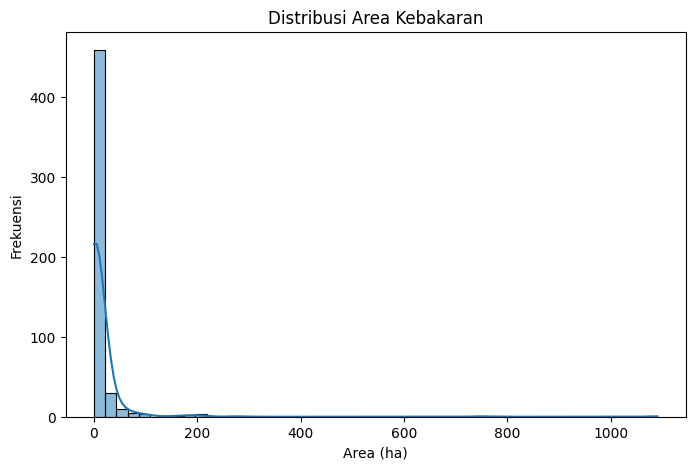

In [ ]:
# 6. Visualisasi
# Distribusi area kebakaran
plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribusi Area Kebakaran")
plt.xlabel("Area (ha)")
plt.ylabel("Frekuensi")
plt.show()

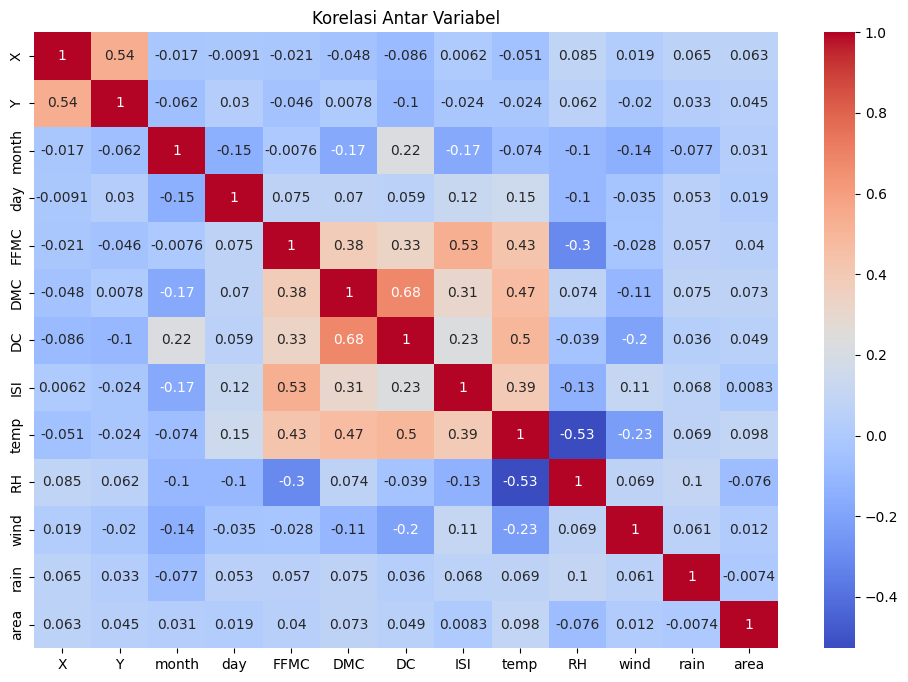

In [ ]:
# Korelasi antar variabel
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel")
plt.show()

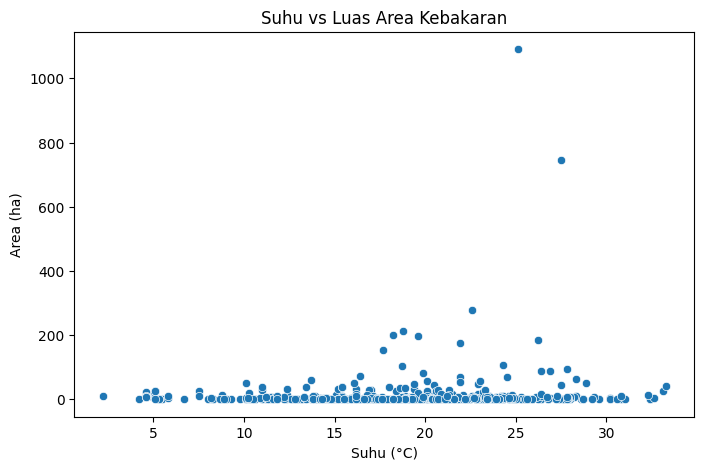

In [ ]:
# Hubungan suhu dan area kebakaran
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='area', data=df)
plt.title("Suhu vs Luas Area Kebakaran")
plt.xlabel("Suhu (°C)")
plt.ylabel("Area (ha)")
plt.show()

In [ ]:
# 7. Pemisahan fitur dan target
X = df.drop(columns=['area'])
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 8. Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n=== Linear Regression ===")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))


=== Linear Regression ===
MSE: 11748.943154648765
RMSE: 108.39254196967966
R²: 0.003293158248679595


In [ ]:
# 9. Model 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Regressor ===")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


=== Random Forest Regressor ===
MSE: 12090.782593737835
RMSE: 109.95809471675032
R²: -0.025706361387748178


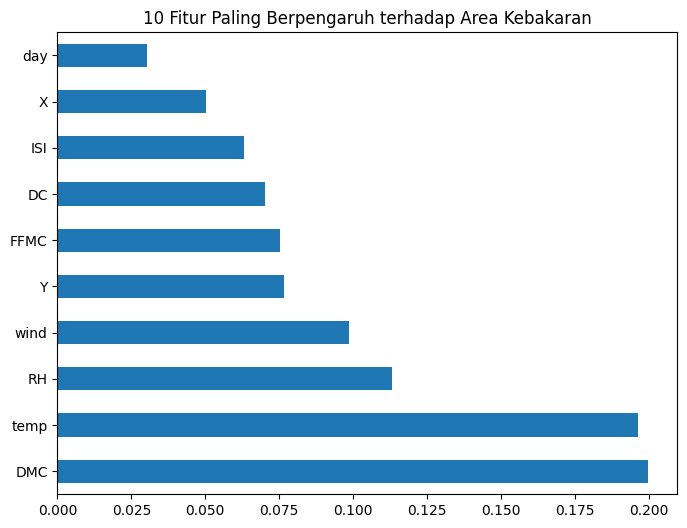

In [ ]:
# 10. Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("10 Fitur Paling Berpengaruh terhadap Area Kebakaran")
plt.show()